In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

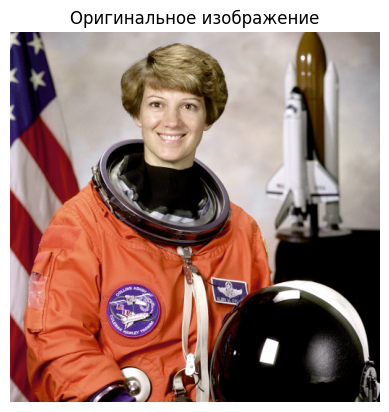

In [26]:
from skimage import data

# Загружаем изображение из встроенного набора
image = data.astronaut()  # Цветное фото из BSDS500
plt.imshow(image)
plt.title("Оригинальное изображение")
plt.axis('off')
plt.show()

In [27]:
# получаем размеры изображения
w, h, d = image.shape
print(f'Размер изображения: {w} x {h}, каналов: {d}')

# Преобразуме изображение в список пикселей 
pixels = image.reshape(-1, 3)
print(f'Форма массива пикселей: {pixels.shape}')

Размер изображения: 512 x 512, каналов: 3
Форма массива пикселей: (262144, 3)


In [40]:
from sklearn.cluster import KMeans

# укажем количество кластеров - количество основных цветов
n_clusters = 7

# Создаем модель KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Обучаем модель на пикселях изображения
kmeans.fit(pixels)

KMeans(n_clusters=7, random_state=0)

In [41]:
# Получаем новые пиксели: каждый пиксель заменяем на цвет центроида
new_colors = kmeans.cluster_centers_[kmeans.labels_]

# Возвращаем обратно в форму изображения
segmented_img = new_colors.reshape(w, h, 3).astype(np.uint8)

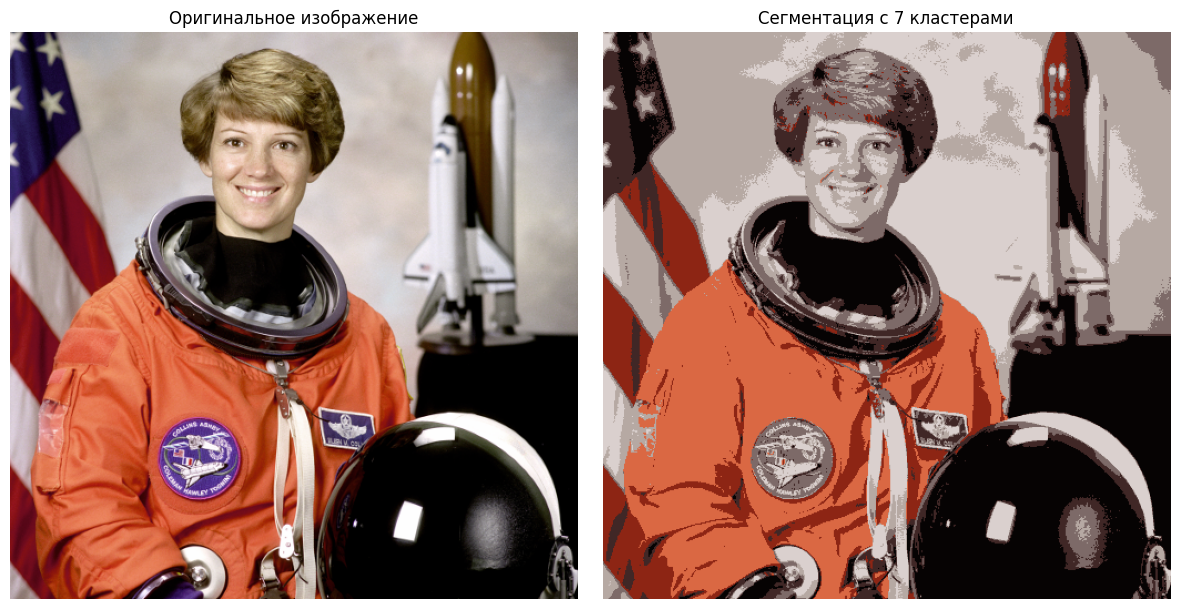

In [42]:
# показываем результат 
plt.figure(figsize=(12, 6))

# Ориг
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Оригинальное изображение")
plt.axis('off')

#Сегментированное
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title(f"Сегментация с {n_clusters} кластерами")
plt.axis('off')

plt.tight_layout()
plt.show()
